In [1]:
import os
import sys
sys.path.append("./../")
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import yaml
import h5py
import vicon_imu_data_process.process_landing_data as pro_rd
import estimation_assessment.scores as es_as

import seaborn as sns
import copy
import re
import json

from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS, DATA_PATH
from vicon_imu_data_process.const import DROPLANDING_PERIOD, RESULTS_PATH
from vicon_imu_data_process import const
from vicon_imu_data_process.dataset import *

from estimation_models.rnn_models import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import time as localtimepkg

from estimation_study import *
from estimation_assessment.visualization import *
#import pdb
import re

tensorflow version: 2.5.0
tensorflow version: 2.5.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU')] []


## Baseline

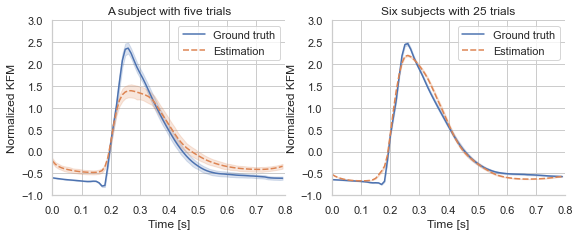

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/data_visulization/2022-10-09/21_39_58_curves..svg


In [17]:
# Plot estimation results of augmentation

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [5] for trial_idx in [5]
                                    ] +[
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [10] for trial_idx in [25]
                                ]

config = {
  'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
  'yticks':[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'ylim':[-1.0, 3.0],
  'figsize': (8,3),
  'ylabels': 5*['Normalized KFM'],
   'titles': ['A subject with five trials', 'Six subjects with 25 trials'],
  'font_scale':1.0, 
   'save_fig': True,
    'save_format': '.svg'
}

figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, col_wrap=2, **config)

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/6sub/metrics.csv
/home/sun/dr

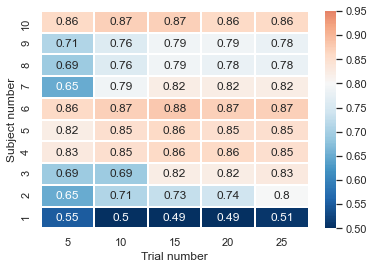

'/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/data_visulization/2022-10-18/09_27_09_results.svg'

In [6]:
# baseline
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,15,1) for trial_idx in range(5,26,5)
]
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
filters={}
baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
baseline_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,len(combination_investigation_results)+1)},inplace=True)
data = baseline_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).mean().round(2).reset_index().pivot('subject_num','trial_num')['r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')
save_format='svg'
save_figure(os.path.dirname(combination_investigation_metrics[0]),fig_format=save_format)


In [16]:
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
baseline_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
baseline_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)

baseline_metrics[['trial_num','subject_num','r2']][baseline_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T
#baseline_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/25trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/6sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing

subject_num,1,2,3,4,5,6
trial_num,25,25,25,25,25,25
min,0.00,0.00,0.07,0.01,0.11,0.13
50%,0.71,0.85,0.87,0.90,0.91,0.91
75%,0.85,0.90,0.92,0.94,0.95,0.95
max,0.96,0.98,0.99,0.99,0.99,0.99


## Augment

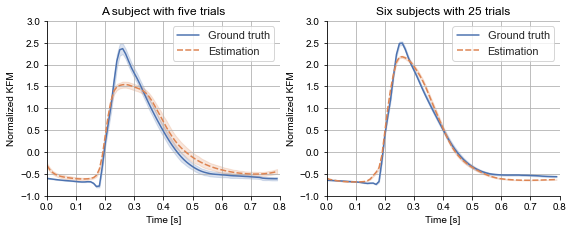

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/data_visulization/2022-10-09/22_59_56_curves..svg


In [9]:
# Plot estimation results of augmentation

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [5] for trial_idx in [5]
                                    ] +[
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in [10] for trial_idx in [25]
                                ]

config = {
  'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
  'yticks':[-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'ylim':[-1.0, 3.0],
  'figsize': (8,3),
  'ylabels': 5*['Normalized KFM'],
   'titles': ['A subject with five trials', 'Six subjects with 25 trials'],
  'font_scale':1.0, 
   'save_fig': True,
    'save_format': 'svg'
}

figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, col_wrap=2, **config)

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/15trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/20trials/6s

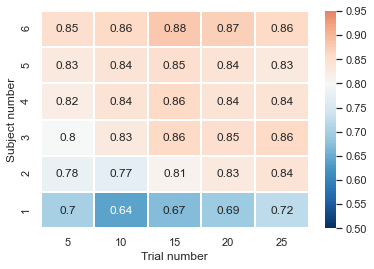

'/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/data_visulization/2022-10-10/01_07_24_results.svg'

In [18]:
# imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
filters={}

aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
aug_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)

data = aug_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).mean().round(2).reset_index().pivot('subject_num','trial_num')['r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')
save_format='svg'
save_figure(os.path.dirname(combination_investigation_metrics[0]),fig_format=save_format)

In [21]:
filters={'drop_value':0.0,'sort_variable':'r2'}
aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
aug_metrics['subject_num'].replace({idx:idx-4 for idx in range(5,11)},inplace=True)
aug_metrics[['trial_num','subject_num','r2']][aug_metrics['trial_num'].isin([25])].groupby(['subject_num','trial_num']).describe().round(2)['r2'][['min','50%', '75%','max']].T

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/15trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/20trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/25trials/5sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/6sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/6sub/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/res

subject_num,1,2,3,4,5,6
trial_num,25,25,25,25,25,25
min,0.00,0.08,0.13,0.12,0.11,0.00
50%,0.82,0.87,0.90,0.89,0.87,0.92
75%,0.88,0.92,0.95,0.94,0.93,0.96
max,0.97,0.98,0.99,0.99,0.99,0.99


## Comparsion

{'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'}
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v

ValueError: Missing hue value `Measured dataset` in model_selection (specified in `pairs`)

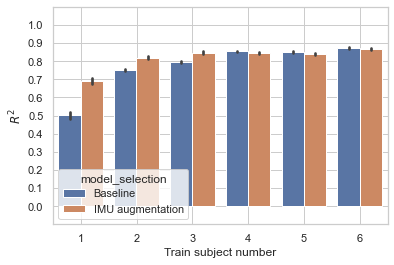

In [5]:
# compare baseline and imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]+ [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]

#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'subject_num': 'Train subject number', 'trial_num': 'Trial number'}
test_pairs =(
            [(1,'Measured dataset'), (1,'Augmented dataset')],
            [(2,'Measured dataset'), (2,'Augmented dataset')],
            [(3,'Measured dataset'), (3,'Augmented dataset')],
            [(4,'Measured dataset'), (4,'Augmented dataset')],
            [(5,'Measured dataset'), (5,'Augmented dataset')],
            [(6,'Measured dataset'), (6,'Augmented dataset')],
            )


plot_config={
        "save_fig": True, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'model_selection',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        'title': 'baseline',
        'yticks': (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'font_scale': 1.0,
    'plot_type': 'barplot',
    'ttest':True,
    'test_pairs':test_pairs
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
p6plot_model_accuracy(combination_investigation_metrics, **plot_config)
